<a href="https://colab.research.google.com/github/jokoeliyanto/ppp/blob/main/%5B4%5D_Customer_Curn_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/jokoeliyanto/ppp/main/images/h4.png">
  </td></tr>
<table>

# Project Background

Customer churn analysis refers to the customer attrition rate in a company. This analysis helps companies identify the cause of the churn and implement effective strategies for retention. In this project wi will use DQLab Telco dataset.

DQLab Telco is a Telco company that already has many branches spread everywhere. Since its establishment in 2019, DQLab Telco has been consistent in paying attention to its customer experience so that customers will not leave it.

Even though it's only a little over 1 year old, DQLab Telco already has many customers who have switched subscriptions to competitors. The management wants to reduce the number of churn customers by using machine learning. Now is the time for us to build the right model to predict customer churn.

# Problems Statements

Build a machine learning model to predict whether a customer will churn or not based on given dataset!

# Steps for Customer Churn Prediction

The steps to be taken are,

1. Loading the Dataset
2. Performing Exploratory Data Analysis
3. Doing Data Pre-Processing
4. Machine Learning Modelling
5. Determining the Best Model

# Load Datasets


## Import Library

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

import pickle

from pathlib import Path 

import warnings
warnings.filterwarnings('ignore')

## Open Dataset


The dataset used is already provided in csv format, computer can read the data through the pandas function in python df_load = pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/dqlab_telco_final.csv')

 
The detailed data are as follows:

* **UpdatedAt** Periode of Data taken
* **customerID** Customer ID
* **gender** Whether the customer is a male or a female (Male, Female)
* **SeniorCitizen** Whether the customer is a senior citizen or not (Yes, No)
* **Partner** Whether the customer has a partner or not (Yes, No)
* **tenure** Number of months the customer has stayed with the company
* **PhoneService** Whether the customer has a phone service or not (Yes, No)
* **InternetService** Customer’s internet service provider (Yes, No)
* **StreamingTV** Whether the customer has streaming TV or not (Yes, No)
* **PaperlessBilling** Whether the customer has paperless billing or not (Yes, No)
* **MonthlyCharges** The amount charged to the customer monthly
* **TotalCharges** The total amount charged to the customer
* **Churn** Whether the customer churned or not (Yes, No)

In [3]:
df_load = pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/dqlab_telco_final.csv')
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,202006,45437311872,Male,No,No,1,Yes,No,Yes,Yes,44.75,44.75,No
6946,202006,45184632574,Female,Yes,No,1,Yes,No,Yes,Yes,70.15,70.15,Yes
6947,202006,45023517923,Female,No,No,1,Yes,Yes,Yes,Yes,85.55,85.55,Yes
6948,202006,45665022680,Female,No,Yes,72,Yes,Yes,Yes,Yes,117.15,8529.50,No


Display dataset size

In [4]:
df_load.shape

(6950, 13)

Show first 5 rows dataset

In [5]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


Show the number of unique Customer ID

In [6]:
df_load.customerID.nunique()

6950

# Performing Exploratory Data Analysis (EDA)

## Visualize Churn Percentage

We want to see a univariate data visualization regarding the percentage of data churn from customers. Use **value_counts()** function to count the unique number of a column, **pie()** to create a pie chart

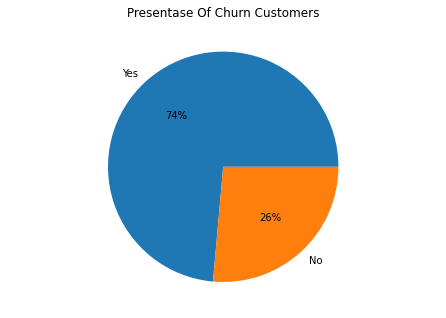

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Presentase Of Churn Customers')
plt.show()

## Exploratory Data Analysis (EDA) of Numerical Variables

What we are going to do next is to select **variable predictor** which is numeric and plot bivariately, then interpret it.

Use the `df_load` data to process at this stage and use the `subplots()` function to create an image and a set of subplots.

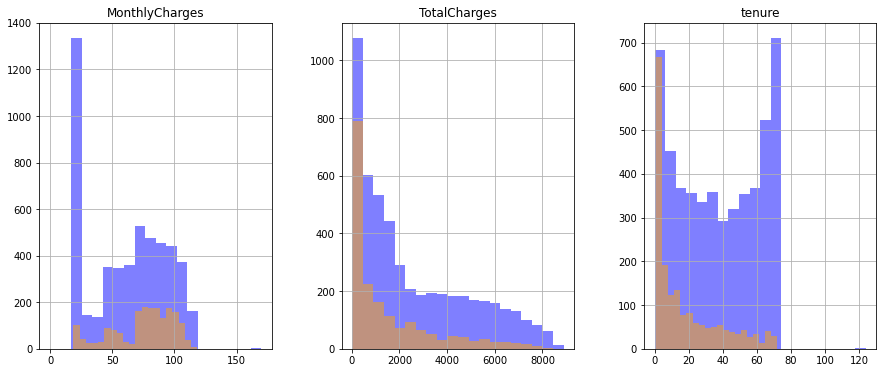

In [8]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

## Exploratory Data Analysis (EDA) Categorical Variables

After that, we will select predictor variables that are categorical and create a bivariate plot, then interpret it.

Use `df_load` data for processing at this stage. Use the `countplot()` function to plot the number of observations in each bin of the categorical variable

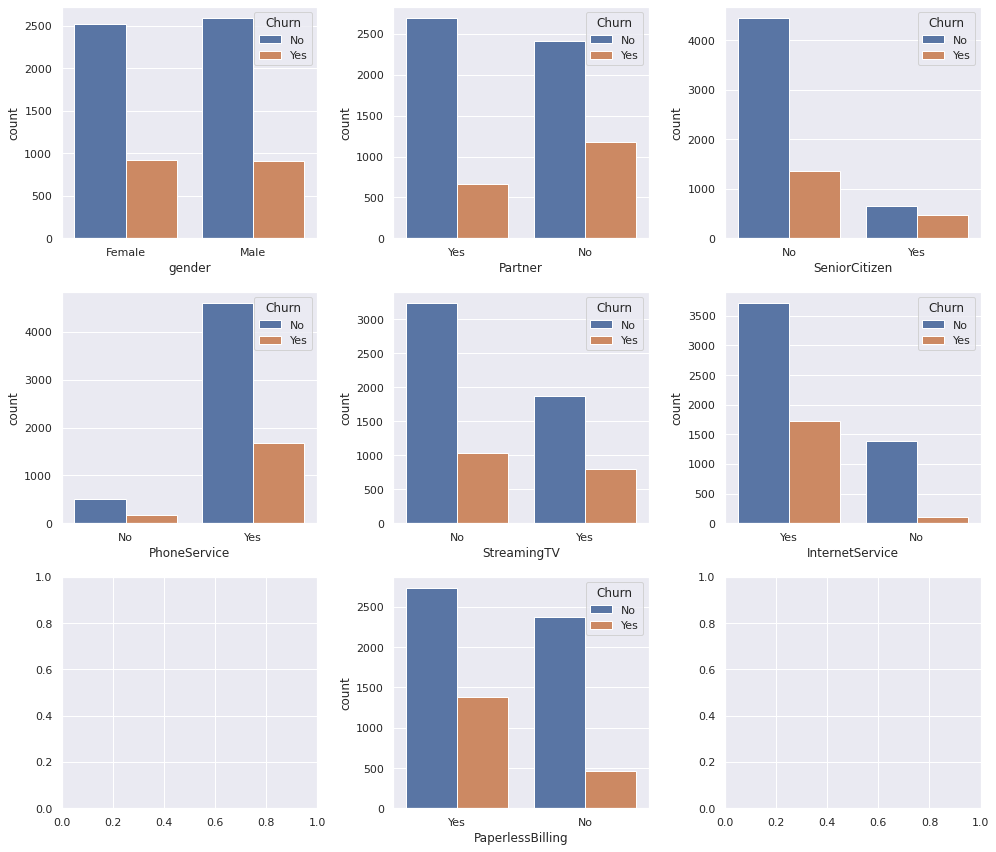

In [9]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

## Conclusion
Based on the results and analysis above, it can be concluded:

* First, we can see that the distribution of data as a whole does not churn customers, with details of Churn as much as 26% and No Churn as much as 74%.

* Second, we can see that for MonthlyCharges there is a tendency that the smaller the monthly fee charged, the smaller the tendency to Churn. For TotalCharges, there seems to be no trend towards Churn customers. For tenure, there is a tendency that the longer the customer subscribes, the smaller the tendency to Churn.

* Third, we can see that there is no significant difference for people who do churn in terms of gender and telephone service. However, there is a tendency that people who churn are people who do not have partners (partners: No), people whose status is senior citizens (SeniorCitizen: Yes), people who have TV streaming services (StreamingTV: Yes) , people who have Internet service (internetService: Yes) and people whose bills are paperless (PaperlessBilling: Yes).

# Data PreProcessing

## Removing Unnecessary Columns from data

Next we will delete the column that will not be included in the modeling, then save it with **name cleaned_df**. Show the top 5 rows.

Use **drop()** to remove a column from a data

In [10]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


## Data Encoding 

Use the data from the results and analysis previously cleaned_df, to change the value of the data that is still in the form of **string** to **transformed** into a form of **numeric** using **LabelEncoder()**. Use **describe()** to see a description of the data.

In [11]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
      if cleaned_df[column].dtype == np.number: continue
      # Perform encoding for each non-numeric column
      cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

cleaned_df.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.415827,0.903741,0.384317,0.783453,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.561336,0.294967,0.486468,0.411921,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


## Splitting Dataset

Use the data from the previous results and analysis **cleaned_df**, to divide the dataset into 2 parts (**70% training & 30% testing**) based on the **predictor (X)** and **target (Y)** variables . Use **train_test_split()** to split the data. Include **value_counts** to check if the division is equal.

Save the result of splitting the data into x_train, y_train, x_test & y_test

In [29]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('The number of rows and columns of x_train is:', x_train.shape,', while the number of rows and columns of y_train is:', y_train.shape)
print('Churn percentage in Training data is:')
print(y_train.value_counts(normalize=True))
print('The number of rows and columns of x_test is:', x_test.shape,', while the number of rows and columns of y_test is:', y_test.shape)
print('Churn percentage in Testing data is:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of x_train is: (4865, 10) , while the number of rows and columns of y_train is: (4865,)
Churn percentage in Training data is:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
The number of rows and columns of x_test is: (2085, 10) , while the number of rows and columns of y_test is: (2085,)
Churn percentage in Testing data is:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


## Conclusion

After further analysis, it turns out that there are columns that are not needed in the model, namely the customer ID number `customerID` & the data collection period `UpdatedAt`, so this needs to be deleted.

Then we continue to change the value of the data that is still in the form of a string to be numeric through encoding, after that it can be seen that the distribution of the data, especially the min and max columns of each variable, has changed to 0 & 1.

The last stage is to divide the data into 2 parts for modeling purposes, after it has been done, it can be seen from the number of rows and columns of each data is appropriate & the percentage of churn column is also the same as the data at the beginning, this indicates that the data is separated properly and correctly.

# Machine Learning Modeling

We will create some machine learning models for this case. Then we choose the best model to use later.

## Logistic Regression



### Modeling

Next we will create a model using the **Logistic Regression** Algorithm.

Use **LogisticRegression()** to call the algorithm, fit to the train data and save it as **log_model**

In [13]:
log_model = LogisticRegression().fit(x_train,y_train)
print('The Logistic Regression model formed is: \n', log_model)

The Logistic Regression model formed is: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Model Performance On Data Training - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the training data as shown below. Use **classification_report()** & **confusion_matrix()**.

In [14]:
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.79      0.79      4865



### Model Performance on Data Training - Display Confusion Matrix Plots

After getting the results of the classification report in the previous stage, now we will visualize the report.

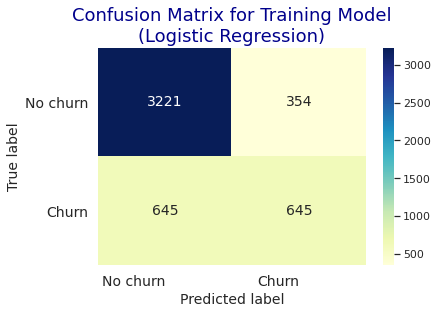

In [15]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Model Performance on Data Testing - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the data testing as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [16]:
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.56       546

    accuracy                           0.79      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.79      0.79      2085



### Model Performance on Data Testing - Display Confusion Matrix Plots

After displaying the metrics in the previous stage, now we will visualize the metrics that have been generated previously

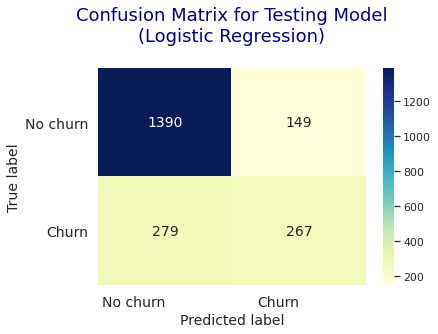

In [17]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Conclusion

From the results and analysis above, then:

* If we use the logistic regression algorithm by calling LogisticRegression() from sklearn without adding any parameters, then the resulting model with default settings from sklearn, details can be seen in the documentation.

* From the training data, it can be seen that the model is able to predict the data with an accuracy of 79%, with details of the correct churn guess, the churn is 645, the non-churn guess that doesn't actually churn is 3221, the non-churn guess that actually churns is 645 and the churn guess which actually doesn't churn is 354.

* From the data testing, it can be seen that the model is able to predict the data by producing an accuracy of 79%, with the details of the correct churn guess, the churn is 267, the non-churn guess that doesn't actually churn is 1390, the non-churn guess that actually has the churn is 279 and the churn guess which actually doesn't churn is 149.

## Random Forest Classifier

### Modeling

Next we will create a model using the **Random Forest Classifier** Algorithm.

Use **RandomForestClassifier()** to call the algorithm, fit to train data and save as **rdf_model**

In [18]:
#Train the model
rdf_model = RandomForestClassifier().fit(x_train,y_train)
print(rdf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


### Model Performance On Data Training - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the **training data** as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [19]:
# Predict
y_train_pred = rdf_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3575
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



### Model Performance On Data Training - Display Confusion Matrix Plots

After displaying the metrics in the previous stage, then we will visualize the metrics

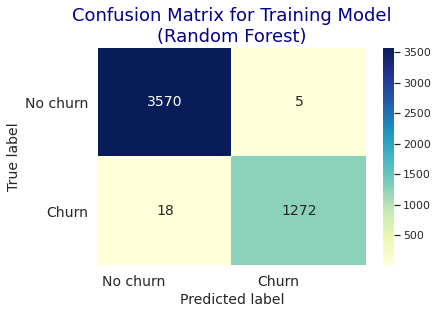

In [20]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Model Performance On Data Testing - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in **data testing** as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [21]:
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest) :
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1539
           1       0.59      0.47      0.52       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.78      0.77      2085



### Model Performance On Data Testing - Display Confusion Matrix Plots

Show a visualization of the results of the metrics that have been obtained in the previous stage

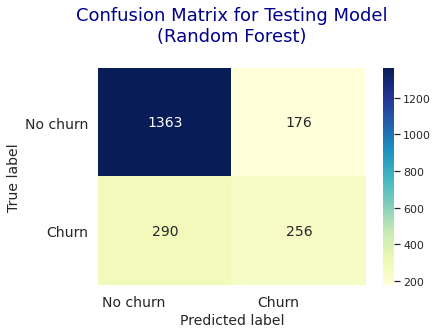

In [22]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Conclusion

From the results and analysis above, then:

* If we use the Random Forest algorithm by calling **RandomForestClassifier()** from sklearn without adding any parameters, the resulting model with the default settings of sklearn, for details can be seen in the documentation.

* From the training data, it can be seen that the model is able to predict the data with an accuracy of 100%, with details of the correct churn guess, the churn is 1272, the non-churn guess that doesn't actually churn is 3570, the no-churn guess that actually churns is 18 and the churn guess which actually doesn't churn is 5.

* From the data testing, it can be seen that the model is able to predict the data with an accuracy of 78%, with the details of the correct churn guess that actually churn is 256, the non-churn guess that doesn't actually churn is 1363, the non-churn guess that actually churn is 290 and the churn guess which actually doesn't churn is 1176.

## Gradient Boosting Classifier

### Modeling

Next we will create a model using the Gradient Boosting Classifier Algorithm.

 
Use **GradientBoostingClassifier()** to call the algorithm, fit to train data and save as **gbt_model**

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train,y_train)
print(gbt_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Model Performance On Data Training - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the training data as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [24]:
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting) :
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



### Model Performance On Data Training - Display Confusion Matrix Plots

Show a visualization of the results of the metrics that have been obtained in the previous stage

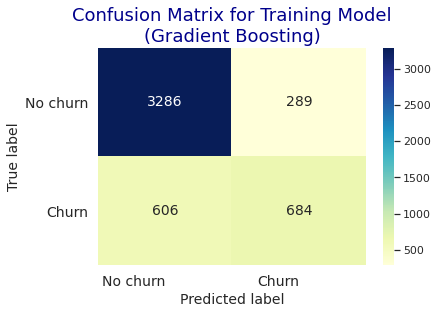

In [25]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Model Performance on Data Testing - Displaying Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the data testing as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [26]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



### Model Performance On Data Testing - Display Confusion Matrix Plots

Show a visualization of the results of the metrics that have been obtained in the previous stage

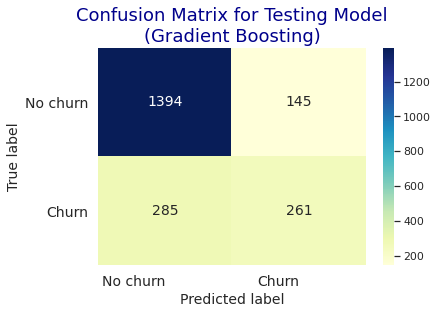

In [27]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Conclusion

From the results and analysis above, then:

* If we use the Gradient Boosting algorithm by calling GradientBoostingClassifier() from the sklearn package without adding any parameters, the resulting model with the default settings of sklearn, for details can be seen in the documentation.

* From the training data, it can be seen that the model is able to predict the data by producing an accuracy of 82%, with the details of the correct churn guess, the churn is 684, the non-churn guess that doesn't actually churn is 3286, the non-churn guess that actually churns is 606 and the churn guess which actually doesn't churn is 289.

* From the data testing, it can be seen that the model is able to predict the data with an accuracy of 79%, with details of the correct churn guess, the churn is 261, the guess not churn that actually doesn't churn is 1394, the guess not churn that actually churn is 285 and the guess churn which actually doesn't churn is 145.

# Determining the Best Model Algorithm



A good model is a model that is able to provide good performance in the training and testing phases of the model.

* Over-Fitting is a condition where the model is able to predict very well in the training phase, but cannot predict as well in the testing phase.
* Under-Fitting is a condition where the model is not able to predict well in the training phase, but is able to predict well in the testing phase.
* Appropriate-Fitting is a condition where the model is able to predict well in the training phase and in the testing phase.

For detailed details, can be seen in the illustration below:

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/jokoeliyanto/ppp/main/images/download.png">
  </td></tr>
<table>

Next, we will determine the best algorithm model from the model that has been done above (Appropriate-Fitting), then we save it as a best_model_churn.pkl file with the aim of modeling later we don't need to repeat the modeling, just call the file. Save in the file directory according to the dataset, then check whether the file is properly saved or not. Use **dump()** from **pickle** to save the file. You can use the code below to save the model file to try on your local laptop.

In [28]:
print(log_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# Conclusion

|              Model           | Accuracy Data Training | Accuracy Data Testing |
| ---------------------------- | ---------------------- |-----------------------|
| Logistic Regression          | 79 %                   |    79%                   |
| Random Forest Classifier     | 100 % (Over-fitting)              |    78%                   |
| Gradient Boosting Classifier | 82 %                  |        79%               |



Based on the results above, it is concluded that the best model is the Gradient Boosting Classifier model. This is due to the acquisition of accuracy on the testing data which is the same as the Logistic Regression model, but it has a higher accuracy on the training data. This value also does not include over-fitting.